# Clustering the data

In this Jupyter Notebook, we will execute the clustering of our dataset.

Instructions: To run this notebook is required to have a the data/gen/analyzed.csv file. Generate it using the analysis.ipynb


In [20]:
import pandas as pd
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
DATA_FILE = 'data/gen/analyzed.csv'

In [5]:
df = pd.read_csv(DATA_FILE)
df.head()

,ANO_EMISION,MES_EMISION,DIA_EMISION,REG_MCPIO,QUIEN_REPORTA,VIC_SEXO,VIC_EDAD,TOTAL_HIJOS,NUM_HIJ_HOM,NUM_HIJ_MUJ,...,AGR_OTROS_HOM,AGR_OTRAS_MUJ,AGR_OTROS_N_OS,AGR_OTRAS_N_AS,INST_DENUN_HECHO,LEY_APLICABLE,FECHA_EMISION,FECHA_HECHO,REG_DPTO,HEC_DPTO
0,2013,1,22,guatemala,Víctima,Mujeres,38.0,2,1,1,...,0.0,0.0,0.0,0.0,Organismo Judicial,Ambas leyes (VIF y VCM),2013-01-22,2013-01-19,guatemala,guatemala
1,2013,1,24,guatemala,Víctima,Mujeres,20.0,1,0,1,...,99.0,99.0,99.0,99.0,Ministerio Público,NaN,2013-01-24,2013-01-23,guatemala,guatemala
2,2013,1,21,guatemala,Víctima,Mujeres,21.0,2,1,1,...,99.0,99.0,99.0,99.0,Procuraduría de los Derechos Humanos,NaN,2013-01-21,2013-01-21,guatemala,guatemala
3,2013,1,2,guatemala,Víctima,Hombres,70.0,0,0,0,...,99.0,99.0,99.0,99.0,Procuraduría de los Derechos Humanos,NaN,2013-01-02,2013-01-02,guatemala,guatemala
4,2013,1,10,guatemala,Víctima,Mujeres,36.0,99,99,99,...,99.0,99.0,99.0,99.0,Procuraduría de los Derechos Humanos,NaN,2013-01-10,2013-01-10,guatemala,guatemala


In [8]:
labelencoder = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = labelencoder.fit_transform(df[column].astype(str))
        
df.head()

,ANO_EMISION,MES_EMISION,DIA_EMISION,REG_MCPIO,QUIEN_REPORTA,VIC_SEXO,VIC_EDAD,TOTAL_HIJOS,NUM_HIJ_HOM,NUM_HIJ_MUJ,...,AGR_OTROS_HOM,AGR_OTRAS_MUJ,AGR_OTROS_N_OS,AGR_OTRAS_N_AS,INST_DENUN_HECHO,LEY_APLICABLE,FECHA_EMISION,FECHA_HECHO,REG_DPTO,HEC_DPTO
0,2013,1,22,80,3,1,38.0,2,1,1,...,0.0,0.0,0.0,0.0,2,1,21,500,6,6
1,2013,1,24,80,3,1,20.0,1,0,1,...,99.0,99.0,99.0,99.0,1,10,23,504,6,6
2,2013,1,21,80,3,1,21.0,2,1,1,...,99.0,99.0,99.0,99.0,5,10,20,502,6,6
3,2013,1,2,80,3,0,70.0,0,0,0,...,99.0,99.0,99.0,99.0,5,10,1,483,6,6
4,2013,1,10,80,3,1,36.0,99,99,99,...,99.0,99.0,99.0,99.0,5,10,9,491,6,6


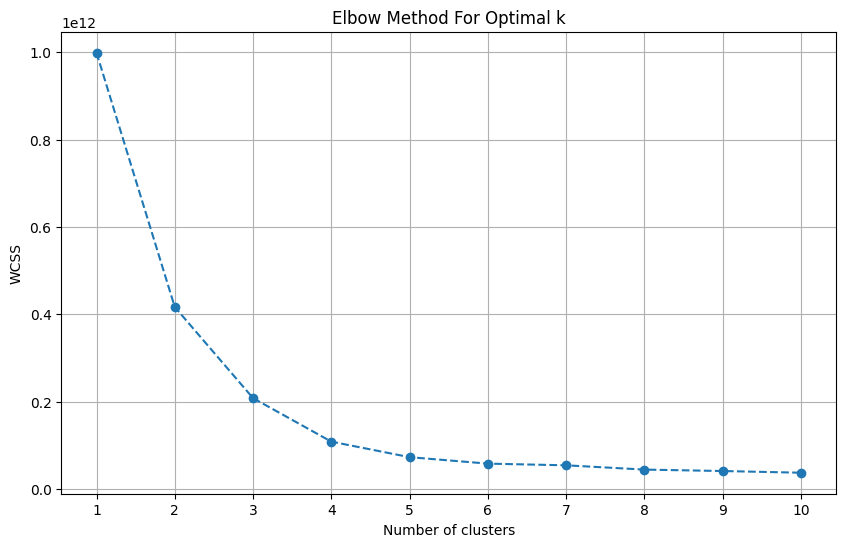

In [15]:
from sklearn.cluster import KMeans

cluster_range = range(1,11)

wcss = []
for i in cluster_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

In [25]:
wcss

[998927115835.0376,
 416424468998.3778,
 207773062888.56674,
 108138454232.94145,
 72593010648.29417,
 57827790362.25108,
 53940815391.28342,
 44151309722.550095,
 40876885940.533295,
 36989910969.565575]

In [27]:
localizador_codo = KneeLocator(range(1,11),
                               wcss,
                               curve='convex',
                               direction='decreasing')

localizador_codo.elbow

3

### 3 Clusters

In [28]:
kmeans = KMeans(3)
kmeans.fit(df)

KMeans(n_clusters=3)

In [29]:
clusters_identificados = kmeans.fit_predict(df)
clusters_identificados

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [30]:
datos_con_clusters = df.copy()
datos_con_clusters['Cluster'] = clusters_identificados
datos_con_clusters

,ANO_EMISION,MES_EMISION,DIA_EMISION,REG_MCPIO,QUIEN_REPORTA,VIC_SEXO,VIC_EDAD,TOTAL_HIJOS,NUM_HIJ_HOM,NUM_HIJ_MUJ,...,AGR_OTRAS_MUJ,AGR_OTROS_N_OS,AGR_OTRAS_N_AS,INST_DENUN_HECHO,LEY_APLICABLE,FECHA_EMISION,FECHA_HECHO,REG_DPTO,HEC_DPTO,Cluster
0,2013,1,22,80,3,1,38.0,2,1,1,...,0.0,0.0,0.0,2,1,21,500,6,6,1
1,2013,1,24,80,3,1,20.0,1,0,1,...,99.0,99.0,99.0,1,10,23,504,6,6,1
2,2013,1,21,80,3,1,21.0,2,1,1,...,99.0,99.0,99.0,5,10,20,502,6,6,1
3,2013,1,2,80,3,0,70.0,0,0,0,...,99.0,99.0,99.0,5,10,1,483,6,6,1
4,2013,1,10,80,3,1,36.0,99,99,99,...,99.0,99.0,99.0,5,10,9,491,6,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319773,2022,12,2,157,3,1,36.0,3,1,2,...,99.0,99.0,99.0,2,0,3622,4103,10,11,0
319774,2022,12,12,157,3,1,28.0,1,1,0,...,2.0,0.0,0.0,2,8,3632,4106,10,11,0
319775,2022,12,12,157,1,1,47.0,1,1,0,...,99.0,99.0,99.0,2,8,3632,4113,10,11,0
319776,2022,12,19,157,3,0,29.0,99,99,99,...,99.0,99.0,99.0,2,8,3639,4119,10,11,0


In [39]:
datos_con_clusters.value_counts('Cluster')

Cluster
0    160098
1    156441
2      3239
Name: count, dtype: int64